In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
#BEGIN7
#Will use own grades and moodle logs to merge
# Module 7 has weeks and 14 students grades.14 passed the module with 0 failures.
#Module 7 is a 2nd year group and would be considered more mature and settled.
#The class sizes are very small (<15).Module 7 has two continuous assessments.
#
#

In [7]:
# Begin7 Data Preperation Module 7
# 3 Files in Module 7
# Module 7

module7ml = pd.read_csv('Module7-MoodleLogs.csv')

In [8]:
module7mg = pd.read_csv('Module7-MoodleGrades.csv')

In [9]:
module7og = pd.read_csv('Module7-OwnGrades.csv')

In [10]:
print (module7mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)', 'Last downloaded from this course']


In [11]:
# Print the number of unique values in each modul7mg column
print(module7mg.nunique())

First name                          14
Surname                             14
ID number                           14
Email address                       14
CA2 - Practical Exam (Real)         14
Quiz: CA3 - Theory Test (Real)      14
Last downloaded from this course     1
dtype: int64


In [12]:
print (module7og.columns.tolist())


['ID number', 'First Name', 'Surname', 'Total CA Mark / 100', 'Final Grade', 'CA1 Report / 20', 'CA2 Lab Test / 35', 'CA3 Theory Test / 35', 'Labs CA / 10', 'Wk1-Lab', 'Wk1-Lecture', 'Wk2-CA / 1', 'Wk2-Lab', 'Wk2-Lecture', 'Wk3-CA / 1', 'Wk3-Lab', 'Wk3-Lecture', 'Wk4-CA / 1', 'Wk4-Lab', 'Wk4-Lecture', 'Wk5-CA / 1.5', 'Wk5-Lab', 'Wk5-Lecture', 'Wk6-CA / 1', 'Wk6-Lab', 'Wk6-Lecture', 'Wk7-CA / 1', 'Wk7-Lab', 'Wk7-Lecture', 'Wk8-CA / 1.5', 'Wk8-Lab', 'Wk8-Lecture', 'Wk9-CA2', 'Wk9-Lecture', 'Wk10-CA / 1', 'Wk10-Lab', 'Wk10-Lecture', 'Wk11-CA / 1', 'Wk11-Lab', 'Wk11-Lecture', 'Wk12-CA3', 'Wk12-Lecture', 'Wk15-Lecture']


In [13]:
module7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                  object
Wk1-Lecture              object
Wk2-CA / 1                int64
Wk2-Lab                  object
Wk2-Lecture              object
Wk3-CA / 1              float64
Wk3-Lab                  object
Wk3-Lecture              object
Wk4-CA / 1                int64
Wk4-Lab                  object
Wk4-Lecture              object
Wk5-CA / 1.5            float64
Wk5-Lab                  object
Wk5-Lecture              object
Wk6-CA / 1              float64
Wk6-Lab                  object
Wk6-Lecture              object
Wk7-CA / 1              float64
Wk7-Lab                  object
Wk7-Lecture              object
Wk8-CA / 1.5            float64
Wk8-Lab                  object
Wk8-Lect

In [14]:

#Engaged = > 55
disengaged7 = module7og['Total CA Mark / 100'] < 55


In [15]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module7og['disengaged'] = np.where(module7og['Total CA Mark / 100']<=55, '1', '0')


In [16]:
module7og['disengaged'] = pd.to_numeric(module7og['disengaged'])


In [17]:
print(module7og['disengaged'].value_counts(dropna=False))

0    11
1     3
Name: disengaged, dtype: int64


In [18]:
m7og = module7og

In [19]:
#Cleanup7OG

In [20]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lecture'] = m7og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})


In [21]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lecture'] = m7og['Wk2-Lecture'].replace({'N': 0 , 'Y': 1})


In [22]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lecture'] = m7og['Wk3-Lecture'].replace({'N': 0 , 'Y': 1})


In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lecture'] = m7og['Wk4-Lecture'].replace({'N': 0 , 'Y': 1})


In [24]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lecture'] = m7og['Wk5-Lecture'].replace({'N': 0 , 'Y': 1})

In [25]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk6-Lecture'] = m7og['Wk6-Lecture'].replace({'N': 0 , 'Y': 1})

In [26]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk7-Lecture'] = m7og['Wk7-Lecture'].replace({'N': 0 , 'Y': 1})

In [27]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk8-Lecture'] = m7og['Wk8-Lecture'].replace({'N': 0 , 'Y': 1})

In [28]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk9-Lecture'] = m7og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [29]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lecture'] = m7og['Wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [30]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lecture'] = m7og['Wk11-Lecture'].replace({'N': 0 , 'Y': 1})

In [31]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-Lecture'] = m7og['Wk12-Lecture'].replace({'N': 0 , 'Y': 1})

In [32]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk15-Lecture'] = m7og['Wk15-Lecture'].replace({'N': 0 , 'Y': 1})

In [33]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lab'] = m7og['Wk1-Lab'].replace({'N': 0 , 'Y': 1})

In [34]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lab'] = m7og['Wk2-Lab'].replace({'N': 0 , 'Y': 1})

In [35]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lab'] = m7og['Wk3-Lab'].replace({'N': 0 , 'Y': 1})

In [36]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lab'] = m7og['Wk4-Lab'].replace({'N': 0 , 'Y': 1})

In [37]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lab'] = m7og['Wk5-Lab'].replace({'N': 0 , 'Y': 1})

In [38]:
# Replace 'no' with 0 and 'yes' with 1 in 'W6-Lecture'  in Module 7

m7og['Wk6-Lab'] = m7og['Wk6-Lab'].replace({'N': 0 , 'Y': 1})

In [39]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk7-Lecture'  in Module 7

m7og['Wk7-Lab'] = m7og['Wk7-Lab'].replace({'N': 0 , 'Y': 1})

In [40]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk8-Lecture'  in Module 7

m7og['Wk8-Lab'] = m7og['Wk8-Lab'].replace({'N': 0 , 'Y': 1})

In [41]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 7

m7og['Wk9-CA2'] = m7og['Wk9-CA2'].replace({'N': 0 , 'Y': 1})

In [42]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lab'] = m7og['Wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [43]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lab'] = m7og['Wk11-Lab'].replace({'N': 0 , 'Y': 1})

In [44]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-CA3'] = m7og['Wk12-CA3'].replace({'N': 0 , 'Y': 1})

In [45]:
m7og.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,disengaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,0
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,0


In [46]:
m7og_subset = m7og

In [47]:
m7og_subset.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,disengaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,0
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,0


In [48]:
#Feature selection7
Xm7og = m7og_subset.iloc[:,5:43]  #independent columns
ym7og = m7og.iloc[:,-1]    #target column i.e engaged


In [49]:
Xm7og.head(2)

,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,Wk1-Lecture,Wk2-CA / 1,Wk2-Lab,Wk2-Lecture,Wk3-CA / 1,...,Wk9-Lecture,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture
0,8.8,27.650,25.40,10.00,1,1,1,1,1,1.0,...,1,1.0,1,1,1.00,1,1,1,1,1
1,16.2,30.975,33.05,9.66,1,1,1,1,1,1.0,...,1,1.0,1,1,0.66,1,1,1,1,1


In [50]:
ym7og.head(2)

0    0
1    0
Name: disengaged, dtype: int64

In [51]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm7og,ym7og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm7og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[ 0.19774717  0.14931365  0.03181818  0.10530303  0.          0.10636364
  0.          0.          0.          0.05946128  0.          0.          0.
  0.          0.          0.03818182  0.          0.          0.00141414
  0.          0.          0.03926962  0.          0.          0.0530303
  0.04184573  0.11064844  0.          0.          0.01450872  0.          0.
  0.02575758  0.01590909  0.          0.          0.          0.00942761]


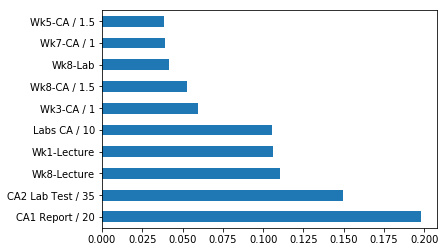

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm7og,ym7og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm7og.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


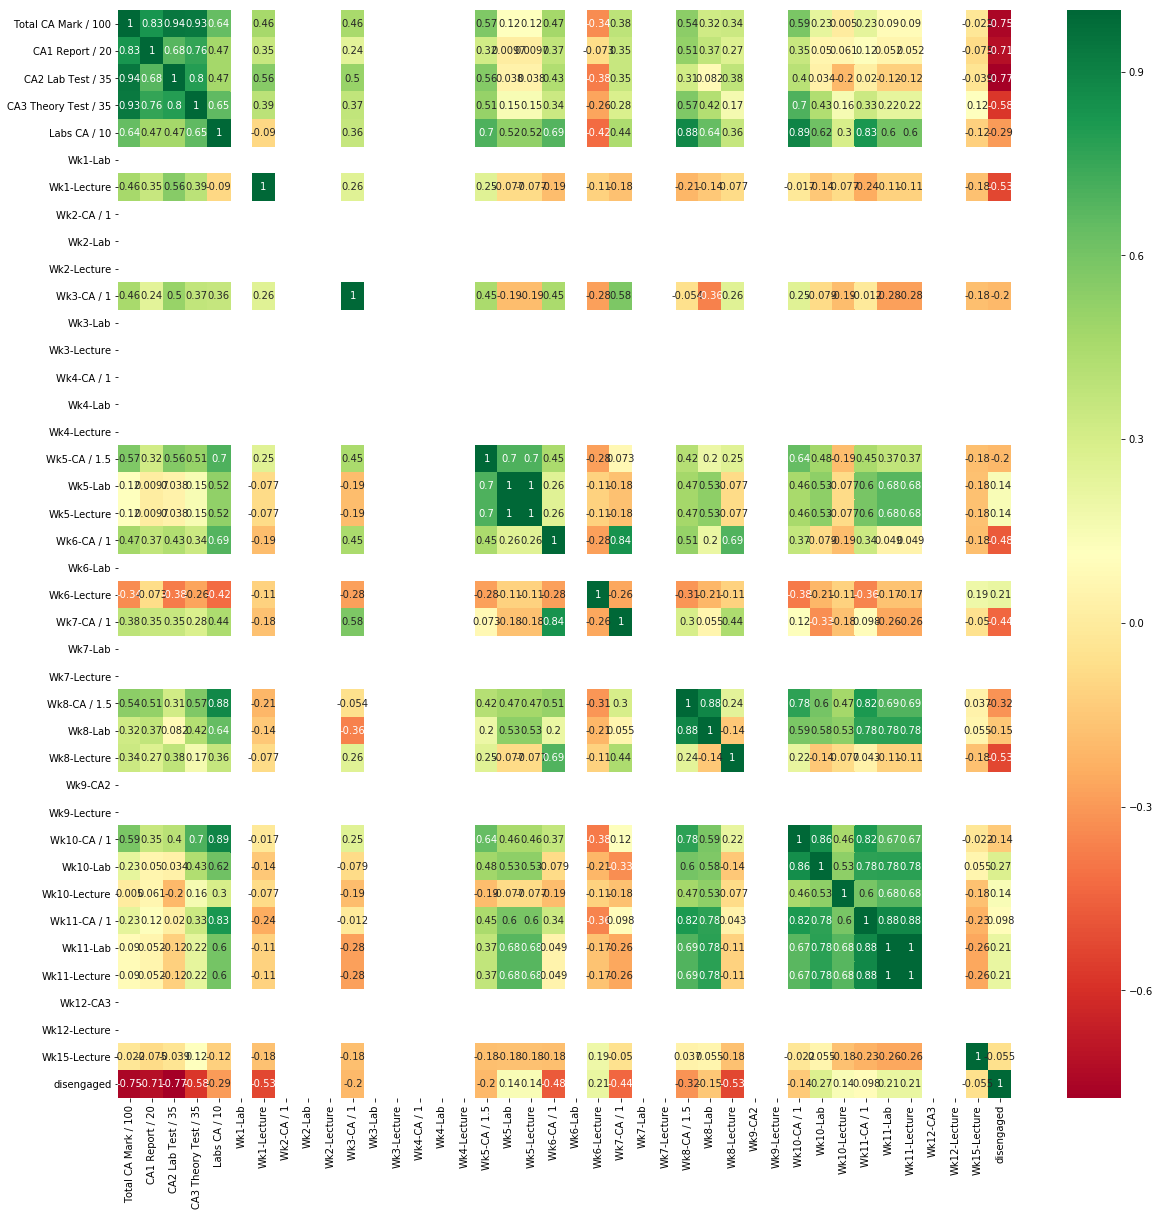

In [53]:
#get correlations of each features in dataset
corrmat = m7og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m7og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [54]:
m7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                   int64
Wk1-Lecture               int64
Wk2-CA / 1                int64
Wk2-Lab                   int64
Wk2-Lecture               int64
Wk3-CA / 1              float64
Wk3-Lab                   int64
Wk3-Lecture               int64
Wk4-CA / 1                int64
Wk4-Lab                   int64
Wk4-Lecture               int64
Wk5-CA / 1.5            float64
Wk5-Lab                   int64
Wk5-Lecture               int64
Wk6-CA / 1              float64
Wk6-Lab                   int64
Wk6-Lecture               int64
Wk7-CA / 1              float64
Wk7-Lab                   int64
Wk7-Lecture               int64
Wk8-CA / 1.5            float64
Wk8-Lab                   int64
Wk8-Lect

In [55]:
# Print the number of unique values in each modul7og column
print(module7og.nunique())

ID number               14
First Name              14
Surname                 14
Total CA Mark / 100     14
Final Grade              6
CA1 Report / 20         10
CA2 Lab Test / 35       14
CA3 Theory Test / 35    14
Labs CA / 10            10
Wk1-Lab                  1
Wk1-Lecture              2
Wk2-CA / 1               1
Wk2-Lab                  1
Wk2-Lecture              1
Wk3-CA / 1               3
Wk3-Lab                  1
Wk3-Lecture              1
Wk4-CA / 1               1
Wk4-Lab                  1
Wk4-Lecture              1
Wk5-CA / 1.5             3
Wk5-Lab                  2
Wk5-Lecture              2
Wk6-CA / 1               3
Wk6-Lab                  1
Wk6-Lecture              2
Wk7-CA / 1               2
Wk7-Lab                  1
Wk7-Lecture              1
Wk8-CA / 1.5             4
Wk8-Lab                  2
Wk8-Lecture              2
Wk9-CA2                  1
Wk9-Lecture              1
Wk10-CA / 1              5
Wk10-Lab                 2
Wk10-Lecture             2
W

In [56]:
# Print the number of unique values in each modul6mg column
print(module7ml.nunique())

Time              1369
User full name      14
Affected user        1
Event context       43
ct                  10
Event name          27
Description         70
Origin               1
IP address           1
dtype: int64


In [57]:
# Cleanup7


In [58]:
#time7
time7 = module7ml["Time"].str.split(",", n = 1, expand = True)

In [59]:
# making separate Date column from new data frame 
module7ml["Date"]= time7[0] 

# making seperate Time column from new data frame
module7ml['Time']= time7[1]


In [60]:
# Convert the date column to datetime64
module7ml.Date = pd.to_datetime(module7ml.Date)

In [61]:
# new data frame with split value columns 
new7 = module7ml["User full name"].str.split(" ", n = 1, expand = True)


In [62]:
# making separate first name column from new data frame 
module7ml["First name"]= new7[0] 

# making separate last name column from new data frame 
module7ml["Last name"]= new7[1] 


In [63]:
module7ml.head(2)

,Time,User full name,Affected user,Event context,ct,Event name,Description,Origin,IP address,Date,First name,Last name
0,15:46,am5M b1HG,-,Course: Module 7,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,-,Course: Module 7,User report,Grade user report viewed,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG


In [64]:
module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

,Time,User full name,Event context,ct,Event name,Date,First name,Last name
0,15:46,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-01-15,am5M,b1HG
2,05:48,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-15,am5M,b1HG
3,15:59,ajdR bQnj,Course: Module 7,System,Course viewed,2019-12-01,ajdR,bQnj
4,15:59,ajdR bQnj,Course: Module 7,User report,Grade user report viewed,2019-12-01,ajdR,bQnj
5,15:59,ajdR bQnj,Course: Module 7,System,Course viewed,2019-12-01,ajdR,bQnj
6,02:44,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-12-01,am5M,b1HG
7,02:44,am5M b1HG,Course: Module 7,System,Course viewed,2019-12-01,am5M,b1HG
8,13:12,ajdR bQnj,Course: Module 7,System,Badge listing viewed,2019-11-01,ajdR,bQnj
9,13:12,ajdR bQnj,Course: Module 7,User report,Grade user report viewed,2019-11-01,ajdR,bQnj


In [65]:
module7ml.head(2)

,Time,User full name,Affected user,Event context,ct,Event name,Description,Origin,IP address,Date,First name,Last name
0,15:46,am5M b1HG,-,Course: Module 7,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,-,Course: Module 7,User report,Grade user report viewed,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG


In [68]:
len(module7ml)

3167

In [69]:
#timeedit7
mask7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= EndDate)

module7ml = module7ml.loc[mask7]

len(module7ml)


2420

In [70]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= TriOne)

FirstFive7 = module7ml.loc[week5_7]
len(FirstFive7)


1605

In [71]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_7 = (module7ml['Date'] >= TriOne) & (module7ml['Date'] <= TriTwo)

FirstTen7 = module7ml.loc[week10_7]

len(FirstTen7)


1019

In [72]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_7 = (module7ml['Date'] >= TriTwo) & (module7ml['Date'] <= EndDate)

FirstFivt7 = module7ml.loc[week15_7]

len(FirstFivt7)


214

In [73]:
# Onehot7
module7ml_onehot = module7ml.copy()
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event name'], prefix = ['Event name'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event context'], prefix = ['Event context'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['ct'], prefix = ['ct'])


print(module7ml_onehot.head())


      Time User full name Affected user  \
0    15:46      am5M b1HG             -   
1    05:48      am5M b1HG             -   
2    05:48      am5M b1HG             -   
45   21:03      ajdR bQnj             -   
46   16:11      am5M b1HG             -   

                                          Description Origin IP address  \
0   The user with id '0' viewed the course with id...    web  127.0.0.1   
1   The user with id '0' viewed the user report in...    web  127.0.0.1   
2   The user with id '0' viewed the course with id...    web  127.0.0.1   
45  The user with id '0' viewed the course with id...    web  127.0.0.1   
46  The user with id '0' viewed the course with id...    web  127.0.0.1   

         Date First name Last name  Event name_A file has been uploaded.  \
0  2019-01-18       am5M      b1HG                                     0   
1  2019-01-15       am5M      b1HG                                     0   
2  2019-01-15       am5M      b1HG                            

In [74]:
module7ml_onehot.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
module7ml_onehot.drop(module7ml_onehot[['IP address','Origin','Description','Affected user']], axis=1)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,2019-01-18,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45,21:03,ajdR bQnj,2018-12-30,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
46,16:11,am5M b1HG,2018-12-28,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
47,14:09,atVF bWWA,2018-12-21,atVF,bWWA,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,14:09,atVF bWWA,2018-12-21,atVF,bWWA,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49,14:08,atVF bWWA,2018-12-21,atVF,bWWA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,14:08,atVF bWWA,2018-12-21,atVF,bWWA,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
51,14:08,atVF bWWA,2018-12-21,atVF,bWWA,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
module7ml_onehot.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
m7ml_subset = module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

In [89]:
m7ml_subset.head(2)

,Time,User full name,Event context,ct,Event name,Date,First name,Last name
0,15:46,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-01-15,am5M,b1HG


In [90]:
m7og_subset.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,disengaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,0
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,0


In [91]:

# Rename the columns of df2_melted: df2_tidy
m7og_subset_tidy = m7og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [92]:
m7og_subset_tidy.head(2)

,ID number,First name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,disengaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,0
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,0


In [93]:
len(m7og_subset_tidy)

14

In [94]:
#Mergesub7
merge_subset7 = pd.merge(module7ml_onehot,m7og_subset_tidy[['First name','disengaged']],on='First name', how='left')

In [95]:
merge_subset7.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report,disengaged
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,1,0,0,0,0
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
merge_subset7.dtypes

Time                                                                       object
User full name                                                             object
Affected user                                                              object
Description                                                                object
Origin                                                                     object
IP address                                                                 object
Date                                                               datetime64[ns]
First name                                                                 object
Last name                                                                  object
Event name_A file has been uploaded.                                        uint8
Event name_A submission has been submitted.                                 uint8
Event name_Add Submission                                                   uint8
Event name_Badge